<a href="https://colab.research.google.com/github/shaikasifthanveer/sk_asif_thanveer/blob/main/Combined_data_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install pandas numpy matplotlib scikit-learn tensorflow


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import files


In [12]:
uploaded = files.upload()  # Upload your CSV when prompted
df = pd.read_csv('combined_crypto_historical_data.csv')
df.columns = [col.strip() for col in df.columns]  # Clean column names


Saving combined_crypto_historical_data.csv to combined_crypto_historical_data (3).csv


In [24]:
def volume_to_float(x):
    if isinstance(x, str):
        x = x.replace(",", "").replace(" ", "")
        if x.endswith("K"):
            return float(x[:-1]) * 1_000
        elif x.endswith("M"):
            return float(x[:-1]) * 1_000_000
        elif x.endswith("B"):
            return float(x[:-1]) * 1_000_000_000
        else:
            try:
                return float(x)
            except:
                return 0.0
    elif isinstance(x, (int, float)):
        return x
    else:
        return 0.0

df['volume'] = df['volume'].apply(volume_to_float)
df = df.dropna(subset=['close', 'open', 'high', 'low', 'volume'])


In [25]:
feature_cols = ['close', 'open', 'high', 'low', 'volume']
seq_length = 60
results = []


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0137
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0028
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0026
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0021
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0018
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0016
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0015
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0015
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0014
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0015
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0014
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0012
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0013
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0014
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0013
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms

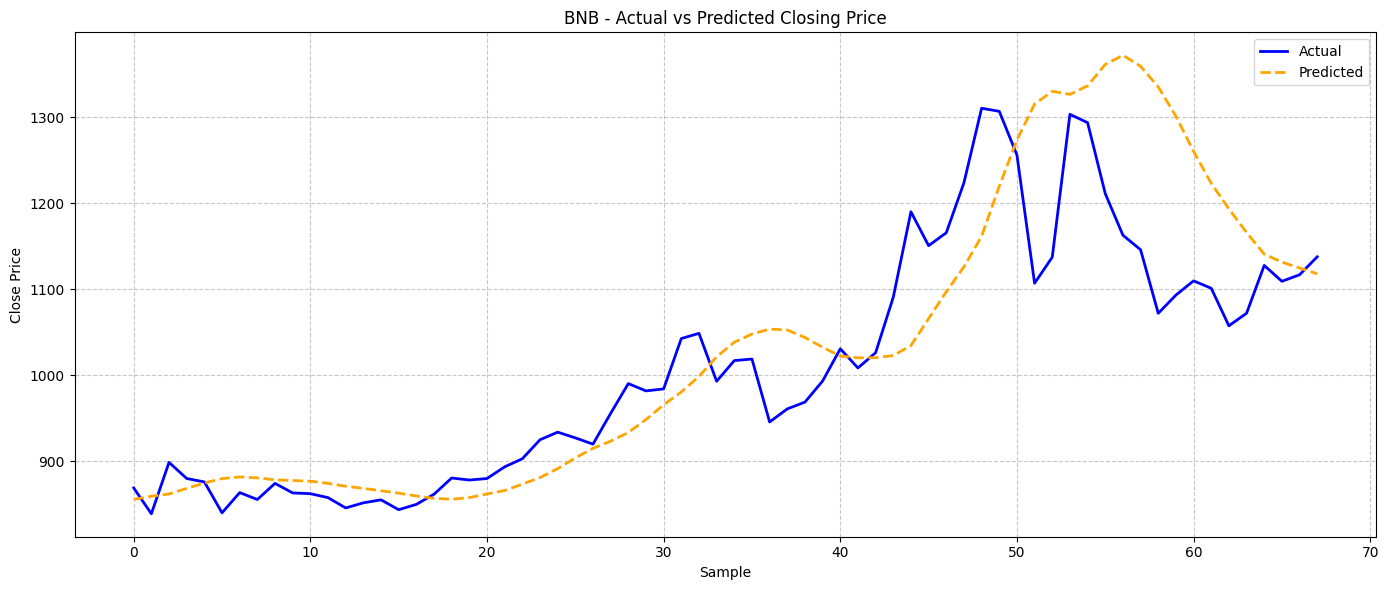

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.1130
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0109
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0099
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0076
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0049
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0050
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0036
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0039
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0039
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0037
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0036
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0031
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0031
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0032
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0030
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms

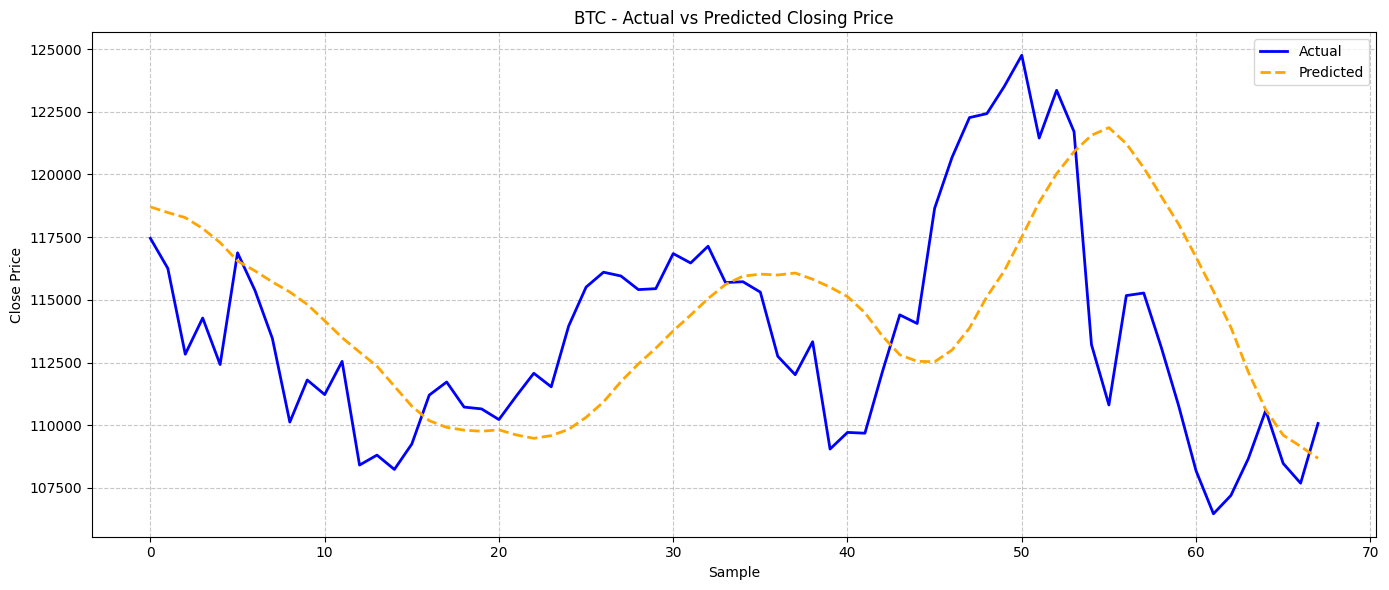

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.1027
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0142
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0082
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0066
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0049
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0044
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0042
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0039
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0036
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0035
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0033
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0042
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0034
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0036
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0037
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72m

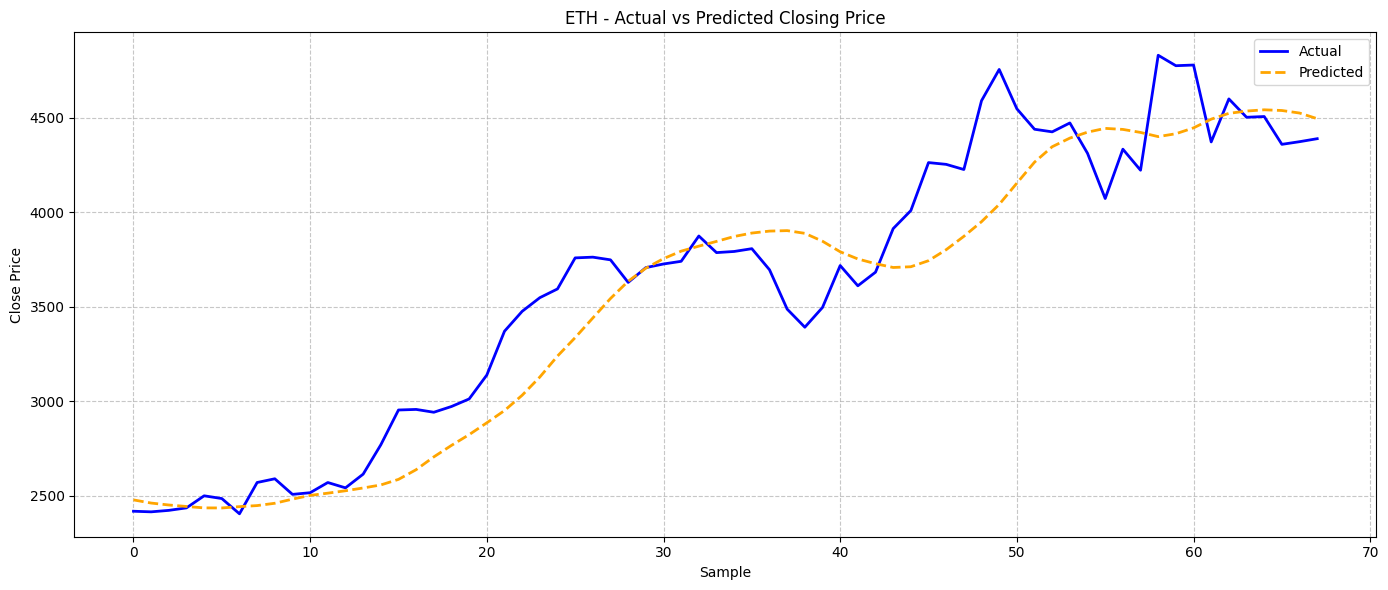

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.2031
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0373
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0303
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0193
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0160
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0175
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0162
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0167
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0166
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0173
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0169
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0163
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0123
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0122
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0148
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms

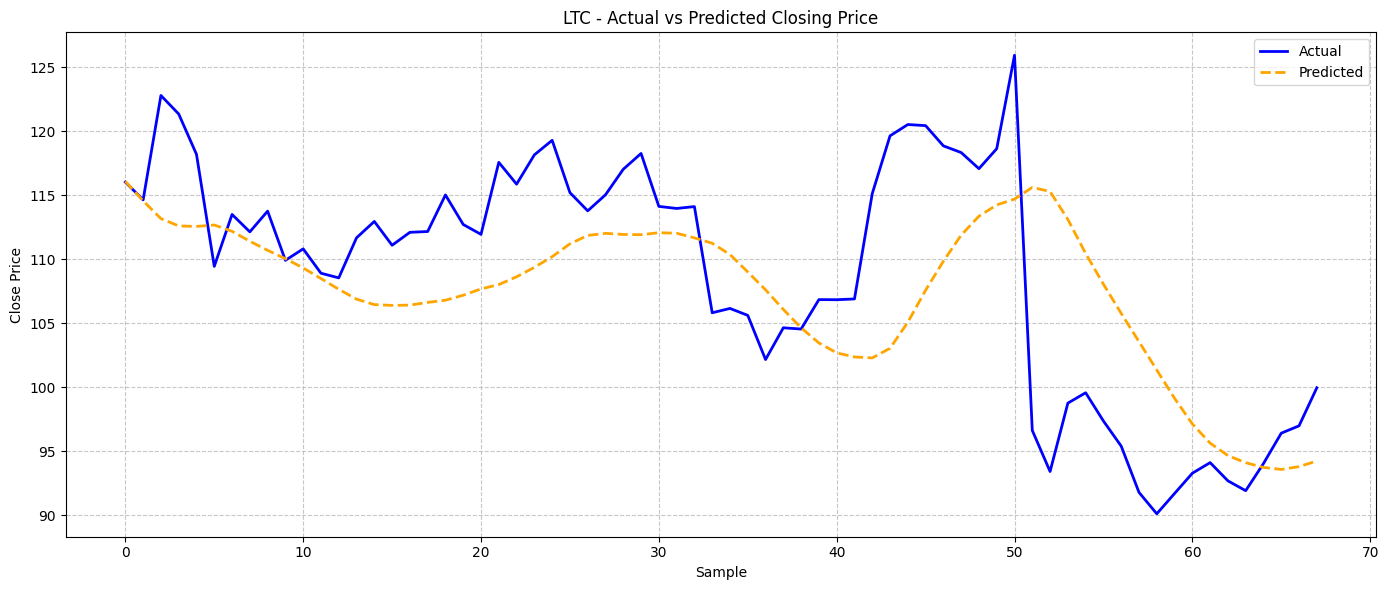

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0162
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 7.3555e-04
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 6.6952e-04
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 8.5281e-04
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 6.5177e-04
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 8.2260e-04
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 7.2851e-04
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 6.8629e-04
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 7.7089e-04
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 6.1958e-04
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 5.8041e-04
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 7.0281e-04
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 5.3169e-04
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 6.3241e-04
Epoch 15/20
77/77 ━━━━━━━━━━━

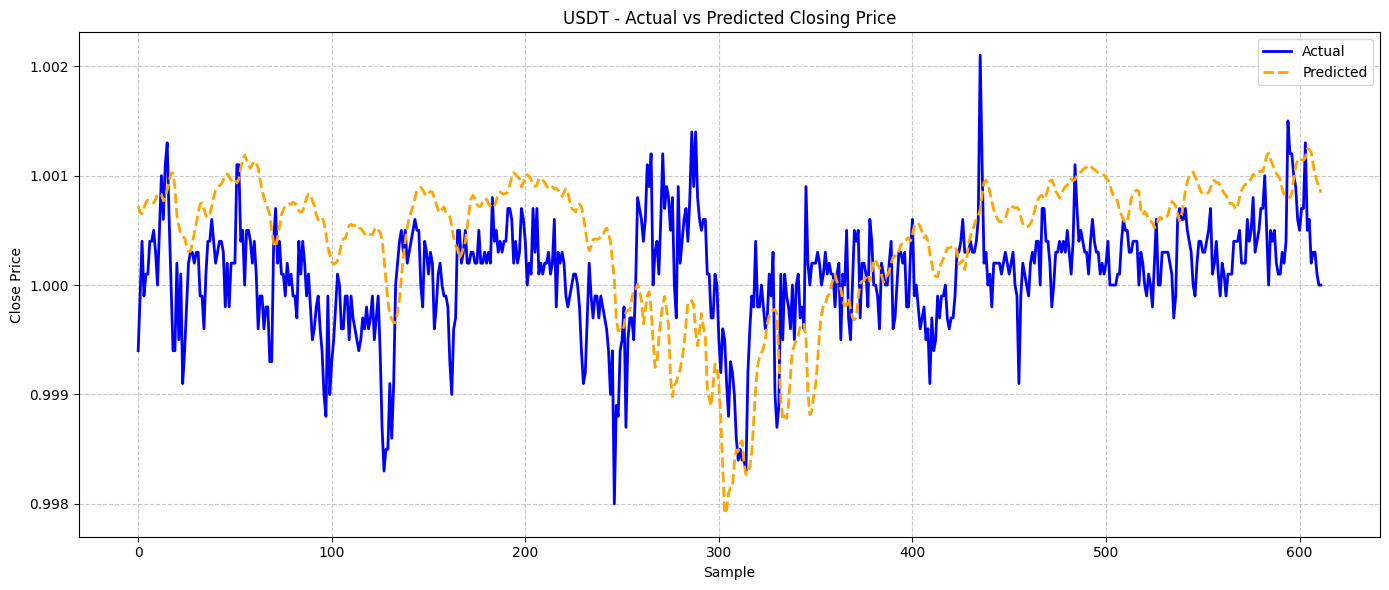

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.1251
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0118
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0105
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0091
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0068
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0068
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0062
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0056
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0055
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0056
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0054
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0058
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0050
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0056
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0052
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63m

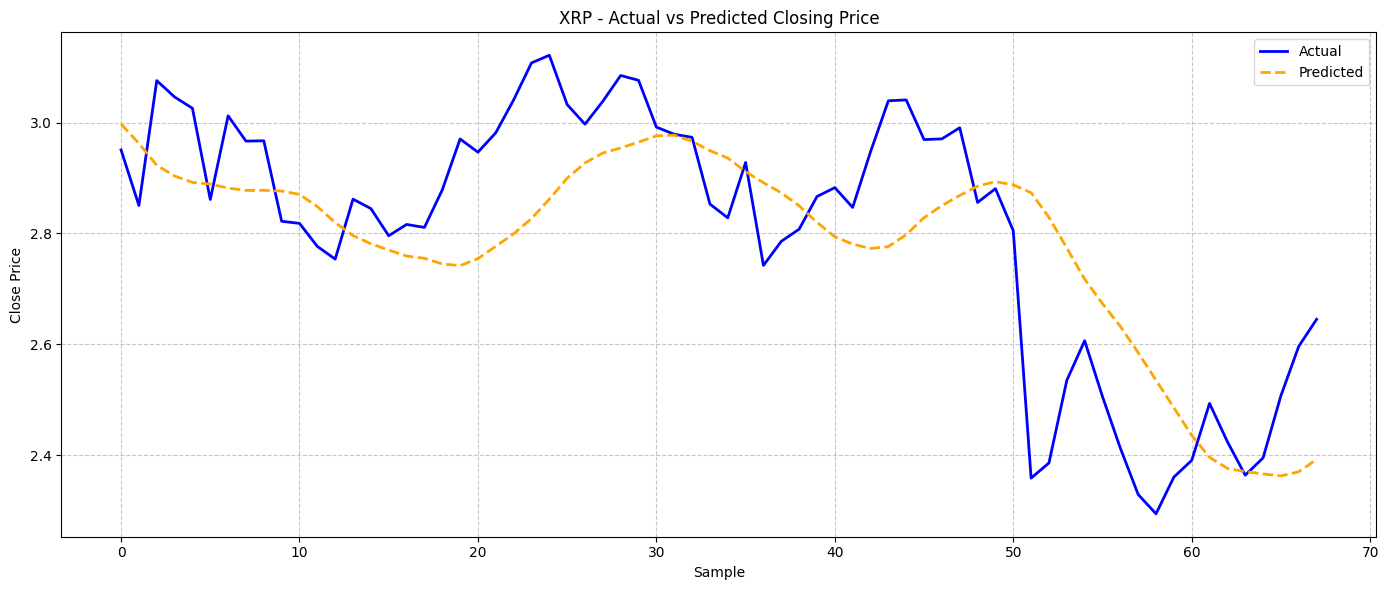

In [26]:
for symbol in df['symbol'].unique():
    try:
        sub = df[df['symbol'] == symbol].sort_values('timestamp')
        features = sub[feature_cols].values
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_features = scaler.fit_transform(features)

        # Sequence creation
        X, y = [], []
        for i in range(seq_length, len(scaled_features)):
            X.append(scaled_features[i-seq_length:i])
            y.append(scaled_features[i, 0])
        if len(X) == 0:
            print(f"Skipping {symbol}, not enough data.")
            continue
        X = np.array(X)
        y = np.array(y)

        split = int(len(X) * 0.8)
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]

        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(seq_length, len(feature_cols))),
            LSTM(50),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

        y_pred_scaled = model.predict(X_test)
        y_pred = scaler.inverse_transform(
            np.concatenate((y_pred_scaled, np.zeros((len(y_pred_scaled), len(feature_cols)-1))), axis=1)
        )[:,0]
        y_true = scaler.inverse_transform(
            np.concatenate((y_test.reshape(-1,1), np.zeros((len(y_test), len(feature_cols)-1))), axis=1)
        )[:,0]

        # Filter out NaNs
        mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
        if mask.sum() == 0:
            print(f"Skipping {symbol}, all values are NaN.")
            continue
        mae = mean_absolute_error(y_true[mask], y_pred[mask])
        mse = mean_squared_error(y_true[mask], y_pred[mask])
        results.append([symbol, mae, mse])

        # Good-quality graph for each coin
        plt.figure(figsize=(14,6))
        plt.plot(y_true[mask], label='Actual', color='blue', linewidth=2)
        plt.plot(y_pred[mask], label='Predicted', color='orange', linestyle="--", linewidth=2)
        plt.title(f"{symbol} - Actual vs Predicted Closing Price")
        plt.xlabel('Sample')
        plt.ylabel('Close Price')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Skipped {symbol} due to error: {e}")
        continue


In [27]:
results_df = pd.DataFrame(results, columns=['Symbol', 'MAE', 'MSE'])
print(results_df)
results_df.to_csv("lstm_multi_crypto_results.csv", index=False)
files.download("lstm_multi_crypto_results.csv")


  Symbol          MAE           MSE
0    BNB    58.973101  7.478164e+03
1    BTC  3620.057157  1.978616e+07
2    ETH   201.587015  6.953549e+04
3    LTC     5.968600  5.812196e+01
4   USDT     0.000627  5.342191e-07
5    XRP     0.126428  2.552102e-02


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>